# Instead of returns, use total index return as preproc. (Failed)

In [83]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import keras

In [84]:
#pretty plots
%matplotlib inline

#Load the index data
raw_data = pd.read_csv('index_data.csv', skiprows=1)
raw_data.set_index(['Date'])

#Relabeling the data
#relabeling the index data
index_close = raw_data.iloc[:,1:]
dates = raw_data.iloc[:,0]

#Display first 5 rows
raw_data.head(20)

,Date,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,...,Turkey BIST 100,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share
0,20030303,9268.77,1525.483,2791.6,3277.27,825.63,590.04,4526.69,649.22,1243.08,...,10128.88,834.81,7837.86,1615.49,6472.53,10280.61,5926.65,328.97,2555.79,8423.99
1,20030304,9181.89,1524.304,2787.0,3244.80,828.05,576.58,4499.69,649.22,1230.76,...,10616.13,821.99,7704.87,1619.92,6422.33,10280.61,5911.24,328.02,2561.26,8317.58
2,20030305,9109.18,1517.179,2749.7,3226.10,822.81,560.26,4418.11,643.07,1226.87,...,10815.49,829.85,7775.60,1617.68,6389.87,10305.52,5914.41,324.70,2552.57,8190.79
3,20030306,8962.26,1498.343,2747.0,3190.35,816.22,555.33,4397.44,642.43,1204.95,...,10841.80,822.10,7673.99,1624.92,6328.60,10615.31,5913.92,329.22,2555.47,8134.38
4,20030307,8907.10,1493.093,2715.0,3153.06,796.17,546.02,4350.59,635.66,1184.96,...,10961.29,828.89,7740.03,1629.81,6359.86,10723.79,5907.93,329.22,2555.47,7973.71
5,20030310,8861.87,1468.919,2711.1,3125.88,784.52,544.24,4319.99,624.78,1170.85,...,10817.49,807.48,7568.18,1626.87,6277.67,10308.61,5859.77,324.99,2495.24,7853.26
6,20030311,8859.93,1469.548,2691.7,3154.91,770.62,532.53,4260.45,619.22,1175.41,...,10744.68,800.73,7524.06,1607.33,6290.73,10339.68,5821.10,325.17,2517.53,7766.04
7,20030312,8874.99,1475.008,2687.1,3110.08,782.36,531.81,4328.15,629.10,1196.47,...,10614.05,804.19,7552.07,1610.21,6228.63,10582.00,5809.97,324.19,2515.96,7769.65
8,20030313,8787.45,1464.649,2673.3,3108.24,778.52,531.78,4378.99,627.46,1195.49,...,10666.63,831.90,7821.75,1612.65,6295.44,10783.04,5931.96,329.33,2525.17,7977.99
9,20030314,8956.17,1466.044,2724.2,3108.24,786.06,537.65,4476.17,628.55,1217.17,...,10604.30,833.27,7859.71,1626.72,6304.49,10817.36,5993.01,329.33,2525.17,8081.24


In [85]:
#Dimensions
print("Number of data points:", index_close.shape[0])
print("Number of indices:", index_close.shape[1])

Number of data points: 3581
Number of indices: 42


In [86]:
#lags, holding period
holding_period = 44 #5-trading days holding period

#Preprocess and transform to log-returns
#Calculate log returns.
daily_ret = np.log(index_close.shift(-44)/index_close)
#Remove first row
dates = dates.drop(dates.index[0:holding_period]).reset_index(drop=True)
daily_ret = daily_ret.drop(daily_ret.index[0:holding_period]).reset_index(drop=True)

daily_ret.head(20)

,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,India S&P BSE SENSEX,TOPIX,KOSPI Composite Index,Taiwan TAIEX,FTSE Bursa Malaysia KLCI,FTSE Straits Times Index,Philippines PSE PSEi,...,Turkey BIST 100,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share
0,0.107526,0.004859,0.026346,0.209724,0.139236,0.130374,0.203317,0.135321,0.177467,0.164608,...,-0.020953,0.071118,0.063251,0.250664,0.062224,0.027740,0.074495,0.076833,0.203866,0.117622
1,0.108219,-0.000020,0.041868,0.232120,0.147107,0.151107,0.231537,0.143136,0.196591,0.157494,...,0.001728,0.072763,0.064420,0.228721,0.067722,0.027913,0.099533,0.076411,0.207688,0.154216
2,0.101687,-0.004205,0.038463,0.225279,0.141000,0.122743,0.224942,0.140238,0.189292,0.181308,...,0.019019,0.056874,0.045062,0.205264,0.057641,0.021814,0.091698,0.035633,0.199136,0.115543
3,0.112726,0.029314,0.040853,0.228768,0.135232,0.154241,0.222337,0.130422,0.197471,0.182358,...,0.018775,0.053414,0.046745,0.174706,0.055016,0.004949,0.078771,0.041571,0.204005,0.104727
4,0.103531,0.010733,0.041433,0.203304,0.110911,0.160941,0.199487,0.118339,0.201370,0.182579,...,0.033879,0.044203,0.045548,0.176871,0.047356,0.012032,0.066344,0.034339,0.194125,0.068853
5,0.105436,-0.031430,0.044671,0.191138,0.129110,0.121481,0.199469,0.119554,0.197926,0.195184,...,0.059529,0.048102,0.053082,0.181445,0.051365,0.049376,0.058161,0.034339,0.190961,0.039526
6,0.105294,-0.038405,0.048784,0.155151,0.130221,0.126965,0.197530,0.123172,0.197537,0.205208,...,0.049317,0.035883,0.047008,0.202720,0.056786,0.033524,0.068917,0.029738,0.211029,0.048856
7,0.096570,-0.037308,0.042210,0.154974,0.135587,0.159807,0.212040,0.113018,0.190820,0.202463,...,0.022853,0.070584,0.075389,0.201042,0.063660,0.082003,0.102060,0.068426,0.210399,0.039380
8,0.089782,-0.021973,0.053421,0.155405,0.144952,0.144586,0.218126,0.112592,0.192046,0.209522,...,0.003525,0.072220,0.079528,0.199608,0.071536,0.079434,0.130722,0.095598,0.207527,0.051577
9,0.091022,-0.026452,0.052819,0.182202,0.154683,0.157392,0.247869,0.103740,0.196922,0.205920,...,-0.006251,0.061100,0.067651,0.179536,0.075160,0.054311,0.131175,0.113784,0.211064,0.066371


In [87]:
#Seperate the indices into 2 classes - lag or no_lag
no_lag = [0, 1, 2, 4, 5, 6, 9, 10]
lag = [i for i in range(0,daily_ret.shape[1]) if i not in no_lag]

#Processing the dataset by applying appropriate lags
lagged_data = daily_ret.iloc[:,lag].shift(1)
lagged_data = pd.concat([daily_ret.iloc[:,no_lag], lagged_data], axis=1)

#Removing the first row
lagged_data = lagged_data.drop(lagged_data.index[0]).reset_index(drop=True)
dates = dates.drop(dates.index[0]).reset_index(drop=True)

#Shifting HSI returns
lagged_data['Hang Seng Index'] = lagged_data['Hang Seng Index'].shift(-holding_period)
lagged_data = lagged_data.drop(lagged_data.index[-holding_period:]).reset_index(drop=True)
dates.drop(dates.index[-holding_period:]).reset_index(drop=True)

lagged_data.head(20)

,Hang Seng Index,SSE Composite Index,ASX All Ordinaries,TOPIX,KOSPI Composite Index,Taiwan TAIEX,Philippines PSE PSEi,NEW ZEALAND NZX 50(CAP),India S&P BSE SENSEX,FTSE Bursa Malaysia KLCI,...,Turkey BIST 100,S&P 500,DJ Industrial Average,Colombia IGBC,Canada S&P/TSX Composite,Brazil Bovespa Index,Mexico IPC,Israel TA-125,Saudi Arabia All Share (TASI),FTSE JSE All Share
0,0.082483,-0.000020,0.041868,0.147107,0.151107,0.231537,0.157494,0.075793,0.209724,0.135321,...,-0.020953,0.071118,0.063251,0.250664,0.062224,0.027740,0.074495,0.076833,0.203866,0.117622
1,0.088314,-0.004205,0.038463,0.141000,0.122743,0.224942,0.181308,0.063631,0.232120,0.143136,...,0.001728,0.072763,0.064420,0.228721,0.067722,0.027913,0.099533,0.076411,0.207688,0.154216
2,0.087456,0.029314,0.040853,0.135232,0.154241,0.222337,0.182358,0.045957,0.225279,0.140238,...,0.019019,0.056874,0.045062,0.205264,0.057641,0.021814,0.091698,0.035633,0.199136,0.115543
3,0.091958,0.010733,0.041433,0.110911,0.160941,0.199487,0.182579,0.042561,0.228768,0.130422,...,0.018775,0.053414,0.046745,0.174706,0.055016,0.004949,0.078771,0.041571,0.204005,0.104727
4,0.078449,-0.031430,0.044671,0.129110,0.121481,0.199469,0.195184,0.044257,0.203304,0.118339,...,0.033879,0.044203,0.045548,0.176871,0.047356,0.012032,0.066344,0.034339,0.194125,0.068853
5,0.073489,-0.038405,0.048784,0.130221,0.126965,0.197530,0.205208,0.055618,0.191138,0.119554,...,0.059529,0.048102,0.053082,0.181445,0.051365,0.049376,0.058161,0.034339,0.190961,0.039526
6,0.089369,-0.037308,0.042210,0.135587,0.159807,0.212040,0.202463,0.058471,0.155151,0.123172,...,0.049317,0.035883,0.047008,0.202720,0.056786,0.033524,0.068917,0.029738,0.211029,0.048856
7,0.131848,-0.021973,0.053421,0.144952,0.144586,0.218126,0.209522,0.067493,0.154974,0.113018,...,0.022853,0.070584,0.075389,0.201042,0.063660,0.082003,0.102060,0.068426,0.210399,0.039380
8,0.128740,-0.026452,0.052819,0.154683,0.157392,0.247869,0.205920,0.071379,0.155405,0.112592,...,0.003525,0.072220,0.079528,0.199608,0.071536,0.079434,0.130722,0.095598,0.207527,0.051577
9,0.127444,-0.045290,0.048406,0.146993,0.169126,0.233508,0.199664,0.064914,0.182202,0.103740,...,-0.006251,0.061100,0.067651,0.179536,0.075160,0.054311,0.131175,0.113784,0.211064,0.066371


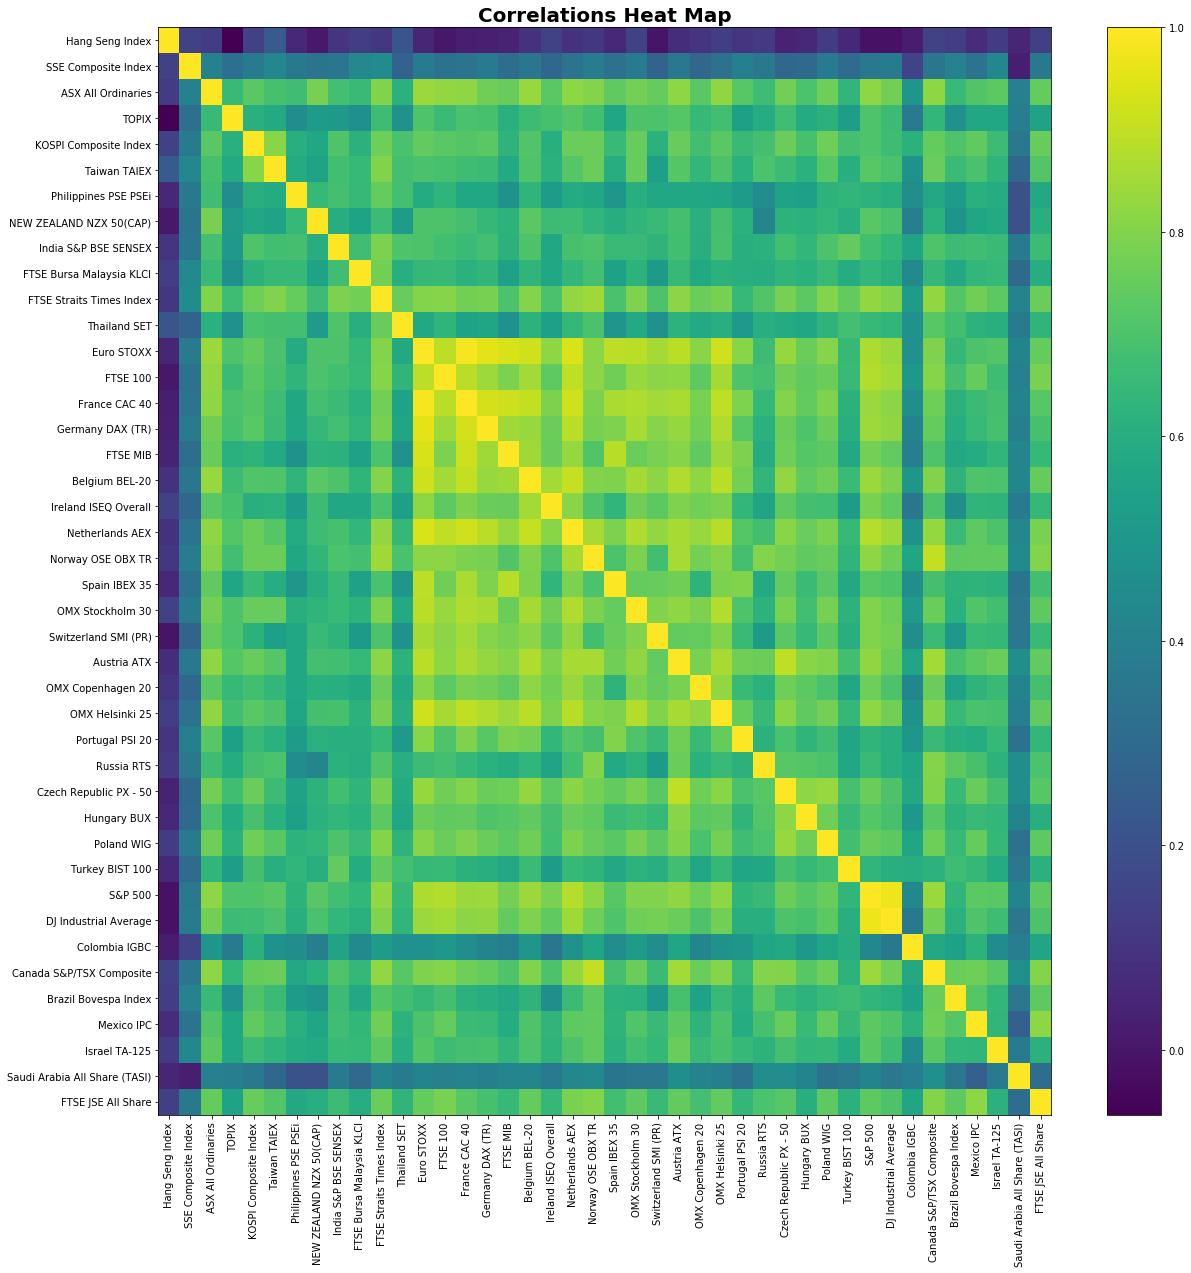

In [88]:
#Calculate correlation
corr = lagged_data.corr()

#Plot the correlation heatmap
plt.figure(figsize=(20,20))
plt.imshow(corr, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlations Heat Map', fontsize=20, fontweight='bold')
plt.show()

In [89]:
#Seperate the features and the labels
labels = lagged_data.iloc[:,0]
X = lagged_data.drop(daily_ret.columns[0], axis=1).reset_index(drop=True)

#Generate the labels from daily Hang Seng returns

#Set labels cutoff for defining Up/Down/Neutral states
labels_cutoff = 0.000627 #Try lower levels....0.05 seems a bit too high



In [90]:
#labels = labels - labels.shift(holding_period)
#labels = labels.drop(labels.index[0:holding_period]).reset_index(drop=True)
#X = X.drop(X.index[0:holding_period]).reset_index(drop=True)

In [91]:
y = np.empty(labels.shape)
y[labels < -labels_cutoff] = 0 #Label -1 for returns lower than -0.05%
y[labels > labels_cutoff] = 2 #Label 1 for returns greater than 0.05%
y[(labels <= labels_cutoff ) & (labels >= -labels_cutoff)] = 1 #Label 0 for the rest

In [92]:
#Import Keras module
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Import sklearn module
from sklearn.metrics import confusion_matrix

In [93]:
#Split into training set and test set
train_size = 0.8 #Again parameter to tune
val_size = 0.1

train_cut_index = int(np.floor(train_size * X.shape[0]))
val_cut_index = int(np.floor((train_size + val_size) * X.shape[0]))

X_train = np.array(X.iloc[0:(train_cut_index-1),:])
X_val = np.array(X.iloc[train_cut_index:(val_cut_index - 1),:])
X_test = np.array(X.iloc[val_cut_index:X.shape[0],:])

y_train = y[0:(train_cut_index-1)]
y_val = y[train_cut_index:val_cut_index-1]
y_test = y[val_cut_index:len(y)]

#Preproc the y_train and y_test using to_categorical function
y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [94]:
#Prediction Period
print("Training Period Start:", dates[0])
print("Training Period End:", dates[train_cut_index-1])
print("Validation Period Start:", dates[train_cut_index])
print("Validation Period End:", dates[val_cut_index-1])
print("Test Period Start:", dates[val_cut_index])
print("Test Period End:", dates[len(dates)-1])
print("Number of data points in training set:", X_train.shape[0])
print("Number of data points in validation set:", X_val.shape[0])
print("Number of data points in test set:", X_test.shape[0])

Training Period Start: 20030509
Training Period End: 20140826
Validation Period Start: 20140827
Validation Period End: 20160125
Test Period Start: 20160126
Test Period End: 20170901
Number of data points in training set: 2792
Number of data points in validation set: 348
Number of data points in test set: 350


In [95]:
#Reshape data for inputting into LSTM
timestep = 1
X_train = np.reshape(X_train, (X_train.shape[0], timestep, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], timestep, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], timestep, X_test.shape[1]))

y_train = np.reshape(y_train, (y_train.shape[0], timestep, y_train.shape[1]))
y_val = np.reshape(y_val, (y_val.shape[0], timestep, y_val.shape[1]))
y_test = np.reshape(y_test, (y_test.shape[0], timestep, y_test.shape[1]))

In [96]:
#Evaluation metrics
from keras import backend as K

#Define f-beta score
def fbeta(y_true, y_pred, threshold_shift=0):
    beta = 0.6

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)
    fn = K.sum(K.round(K.clip(y_true - y_pred, 0, 1)), axis=1)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)

    beta_squared = beta ** 2
    return K.mean((beta_squared + 1) * (precision * recall) / (beta_squared * precision + recall + K.epsilon()))

#Define precision score
def precision(y_true, y_pred, threshold_shift=0):

    # just in case of hipster activation at the final layer
    y_pred = K.clip(y_pred, 0, 1)

    # shifting the prediction threshold from .5 if needed
    y_pred_bin = K.round(y_pred + threshold_shift)

    tp = K.sum(K.round(y_true * y_pred_bin), axis=1) + K.epsilon()
    fp = K.sum(K.round(K.clip(y_pred_bin - y_true, 0, 1)), axis=1)

    precision = tp / (tp + fp)

    return precision

def hit_rate(y_true, y_pred):
    
    #Calculate Hit Rate of the prediction
    true_class = K.argmax(y_true, axis = -1)
    pred_class = K.argmax(y_pred, axis = -1)
    

In [97]:
#Print model evaluation metrics, takes in model scores from training and test set
def print_metrics(model_score):
    print("Test Loss:", model_score[0])
    print("Test F-beta:", model_score[1])
    print("Test Precision:", model_score[2])
    print("Test Accuracy:", model_score[3])

In [98]:
#Define plot metrics - can add more metrics towards it

def plot_metrics(model):
       
    #Plotting Loss over Epoch
    plt.figure(1)
    plt.plot(model.history['loss'])
    plt.plot(model.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    #Plotting F-beta over Epoch
    plt.figure(2)
    plt.plot(model.history['fbeta'])
    plt.plot(model.history['val_fbeta'])
    plt.title('F-Beta Score, beta=0.6')
    plt.ylabel('F-Beta Score')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    #Plotting Precision over Epoch
    plt.figure(3)
    plt.plot(model.history['precision'])
    plt.plot(model.history['val_precision'])
    plt.title('Model Precision')
    plt.ylabel('Precision')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    #Plotting Hit Rate over Epoch
    plt.figure(4)
    plt.plot(model.history['acc'])
    plt.plot(model.history['val_acc'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training','Validation'], loc='upper left')
    
    plt.show()

In [99]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = "Normalized confusion matrix"
    else:
        title = 'Confusion matrix, without normalization'

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [100]:
#Utility function to return class numbers from probabilities
def prob_to_class(pred):
    return(np.argmax(pred, axis=-1))

In [101]:
#Setting base LSTM Network Parameters
drop_out = 0.65
input_shape = X_train.shape
num_epoch = 100
loss_fcn = 'categorical_crossentropy'
learning_rate = 1
opt = optimizers.Nadam(lr=learning_rate)
alpha = 1
num_of_perceptron = np.int(0.5 * (X_train.shape[2] + 3)) * alpha

In [102]:
#Callbacks
saveModel = ModelCheckpoint(filepath='weights.hdf5', verbose=1, save_best_only=True, mode='auto')
earlyStop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto', min_delta=0.0001)
callbacks = [saveModel, earlyStop]

In [103]:
%%time
#Fit LSTM
from keras.layers import LSTM

#Setting up the instance
lstm_model = Sequential()

#Adding 1st LSTM layer
lstm_model.add(LSTM(num_of_perceptron, input_shape=input_shape[1:], return_sequences=True, activation='tanh'))
lstm_model.add(Dropout(drop_out))

#Adding Output Layer
lstm_model.add(Dense(3, activation='softmax'))
lstm_model.summary()

#Optimization
#Define Optimizer, using Stochastic Gradient Decent
lstm_model.compile(loss=loss_fcn, optimizer=opt, metrics=[fbeta, precision, 'accuracy'])

#Fitting the model
lstm = lstm_model.fit(X_train, y_train, epochs = num_epoch, verbose=1, validation_data=(X_val, y_val), shuffle=False, batch_size=1, callbacks=[earlyStop])

#Evaluation
lstm_score = lstm_model.evaluate(X_test, y_test)

#Predict
lstm_pred = lstm_model.predict(X_test, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 22)             5632      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 22)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1, 3)              69        
Total params: 5,701
Trainable params: 5,701
Non-trainable params: 0
_________________________________________________________________
Train on 2792 samples, validate on 348 samples
Epoch 1/100
2792/2792 [==============================] - 15s - loss: 6.1342 - fbeta: 0.7413 - precision: 0.8707 - acc: 0.6121 - val_loss: 8.1980 - val_fbeta: 0.6609 - val_precision: 0.8305 - val_acc: 0.4914
Epoch 2/100
 382/2792 [===>..........................] - ETA: 11s - loss: 4.8523 - fbeta: 0.7993 - precision: 0.8997 - acc: 0.6990

KeyboardInterrupt: 

In [ ]:
    print_metrics(lstm_score)
    
    plot_metrics(lstm)
    
    cfm = confusion_matrix(prob_to_class(y_test), prob_to_class(lstm_pred)) 
    plot_confusion_matrix(cfm, classes=['Down', 'Neutral', 'Up'], normalize=False)

In [ ]:
lstm_pred

In [ ]:
y_test